In [9]:
import numpy as np
import pandas as pd
import math
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib.cm as cm
import matplotlib.pyplot as plt


In [5]:
import csv

with open('../results/labels_alt8_1.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    labels = list(reader)
with open('../results/predClasses_alt8_1.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    pred = list(reader)
with open('../results/predEntropy_alt8_1.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    entropy = list(reader)

In [6]:
def exitAccuracy(results, labels, classes=[]):
    """ find the accuracy scores of the main network exit for each class
            if classes is empty, return the average accuracy for all labels
    """    
    print("number of classes {}".format(len(classes)))
    print("correct answer {}".format(results.sum()))

    classAcc = {}
    correct =[]
    count = []
    percentage = []
    if len(classes) > 0:
        for i, labelClass in enumerate(classes):            
            correct.append(results[np.where(labels==labelClass)].sum())
            count.append(len(labels[np.where(labels == labelClass)]))
#             try:
            p = results[np.where(labels==labelClass)].sum()/len(labels[np.where(labels == labelClass)])
#             except expression as identifier:
#                 p = 0 
            percentage.append(p)
            classAcc[labelClass] = results[np.where(labels==labelClass)].sum()/len(labels[np.where(labels == labelClass)])
    else: 
        correct.append(results.sum())
        count.append((len(labels)))
        p = results.sum()/len(labels)
        percentage.append(p)
        classAcc["all"] = p
    avgAcc = results.sum()/len(labels)
    
        
    print("correct {}".format(correct))
    print("count {}".format(count))
    print("percentage {}".format(percentage))

    return avgAcc, classAcc

def findMainExitAccuracies(pred, labels, num_outputs, labelClasses=[], output_names=[],graph=True):
        """ find the accuracy scores of the main network exit for each class
            if classes is empty, return the average accuracy for all labels
        """
        results = np.equal(pred, labels)
        pred = np.array(pred)
        print(pred.dtype)
        
        labels = np.array(labels)
        
        transpose_results = np.transpose(results) #truths
        transpose_preds = np.transpose(pred) #per exit rather then per input
        transpose_labels = np.transpose(labels)
        # %matplotlib inline
        if graph==True:
            plt.style.use('seaborn-whitegrid')
            fig = plt.figure()
            fig.tight_layout()
            fig.set_size_inches(18.5, 10.5, forward=True)
        df =  pd.DataFrame() 
        print("correct answers {}".format(transpose_results[0].sum()))
        print("passed results {}".format(len(transpose_results[0])))
        avgAcc, classAcc= exitAccuracy(transpose_results[0],transpose_labels[0],labelClasses)
#         print(avgAcc)
        fig, ax = plt.subplots()
        ticks = []
        if graph==True:
            for i, x in enumerate(classAcc):
                ticks.append(x)
#                 print(x)                
                plt.bar(x, classAcc[x], label="Class: {}".format(x),alpha=0.8) 
                if classAcc[x] != 0:
                    if type(x) != str:
                        plt.text(x-.3, classAcc[x]-0.025, "{}".format(round(classAcc[x],2)), color='black', va='center', fontweight='bold')
                    else: 
                        plt.text(x, classAcc[x]-0.025, "{}".format(round(classAcc[x],2)), color='black', va='center', fontweight='bold')
#                 plt.bar(x, avgAcc, label="Avg Accuracy",alpha=0.8,bottom=classAcc[x]) 
            if len(labelClasses) > 0:
                plt.hlines(avgAcc,-.5,len(classAcc.keys())-.5,label ="Accuracy", linestyles="dashed", alpha=0.5)
                plt.text(len(classAcc.keys())-.5, .74, ' Avg Acc%', ha='left', va='center')
            
    #     print(sum(classAcc.values())/len(classAcc.values()))
        if graph==True:
            plt.xticks(ticks)
            plt.title("Class Label Accuracy")
            plt.ylabel("Accuracy %")
            plt.xlabel("Label Class #")
            plt.show()
        return classAcc
    
    
def graphclassAccuracy(pred, labels, num_outputs, classes, output_names=[],graph=True):
    """ finds the class accuracies of the main exit and the branches.
    """
       
        
#           print(sum(classAcc.values())/len(classAcc.values()))
   
    #get series of entropy values, series of 
#     print(pred)
    resultsDict = {}
    results = np.equal(pred, labels)
    pred = np.array(pred)
    labels = np.array(labels)
    
    classCount = {}
#     results = pred
    labelClasses=classes
    transpose_results = np.transpose(results) #truths
    transpose_preds = np.transpose(pred) #per exit rather then per input
    transpose_labels = np.transpose(labels)
    # %matplotlib inline
    if graph==True:
        plt.style.use('seaborn-whitegrid')
        fig = plt.figure()
        fig, axs = plt.subplots(2, 2)
        fig.tight_layout()
        ticks = []
        series=[]
    df =  pd.DataFrame() 
    returnData = []
    print("label classes{}".format(labelClasses))
    for i in range(num_outputs):
        print("output: {}".format(i))

        avgAcc, classAcc= exitAccuracy(transpose_results[i],transpose_labels[i],labelClasses)
        if graph==True:
            for j, x in enumerate(classAcc):
                ticks.append(x)
#                 print(classAcc[x])       
                axs[round(int(i/2)), round(i%2)].set_ylim([0, 1])
                axs[round(int(i/2)), round(i%2)].bar(x, classAcc[x], label="Class: {}".format(x),alpha=0.8) 
                if type(x) != str:
                    axs[round(int(i/2)), round(i%2)].text(x-.3, classAcc[x]-0.025, "{}".format(round(classAcc[x],2)), color='black', va='center', fontweight='bold')
                else: 
                    axs[round(int(i/2)), round(i%2)].text(x, classAcc[x]-0.025, "{}".format(round(classAcc[x],2)), color='black', va='center', fontweight='bold')
#                 plt.bar(x, .74, label="Avg Accuracy",alpha=0.8,bottom=classAcc[x]) 
            if len(labelClasses) > 0:
                axs[round(int(i/2)), round(i%2)].hlines(avgAcc,-.5,len(classAcc.keys())-.5,label ="Avg Acc", linestyles="dashed", alpha=0.5)
#                 axs[round(int(i/2)), round(i%2)].text(len(classAcc.keys())-.5, .74, ' Avg Acc', ha='left', va='center')
            if len(output_names) >= i:
                axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(output_names[i]))
            else:
                axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(i))
    #     print(sum(classAcc.values())/len(classAcc.values()))
            
    if graph==True:        
        lines = []
        labels = []
        for ax in fig.axes:
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            axLine, axLabel = ax.get_legend_handles_labels()
            lines=(axLine)
            labels=(axLabel)

        # Set common labels
        fig.text(0.5, 0.01, 'Label Class #', ha='center', va='center')
        fig.text(-0.01, 0.5, 'Accuracy %', ha='center', va='center', rotation='vertical')
# ax.xaxis.set_label_coords(1.05, -0.025)

#         fig.legend(lines, labels,bbox_to_anchor=(1., 1), loc=2,borderaxespad=0.,frameon=True)
        plt.setp(axs, xticks=ticks, xticklabels=ticks)
#         plt.xticks(ticks)
        plt.show()
#     print(output)
    
#     print(df)
#     df.to_csv("graph_output.csv")
    return returnData



label classes[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
output: 0
number of classes 10
correct answer 8439
correct [863, 933, 774, 679, 818, 772, 904, 886, 919, 891]
count [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
percentage [0.863, 0.933, 0.774, 0.679, 0.818, 0.772, 0.904, 0.886, 0.919, 0.891]
output: 1
number of classes 10
correct answer 6034
correct [644, 782, 437, 421, 448, 441, 738, 681, 763, 679]
count [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
percentage [0.644, 0.782, 0.437, 0.421, 0.448, 0.441, 0.738, 0.681, 0.763, 0.679]
output: 2
number of classes 10
correct answer 7071
correct [729, 848, 555, 568, 609, 557, 849, 746, 812, 798]
count [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
percentage [0.729, 0.848, 0.555, 0.568, 0.609, 0.557, 0.849, 0.746, 0.812, 0.798]
output: 3
number of classes 10
correct answer 8208
correct [856, 895, 751, 670, 802, 721, 875, 854, 898, 886]
count [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
pe

<Figure size 432x288 with 0 Axes>

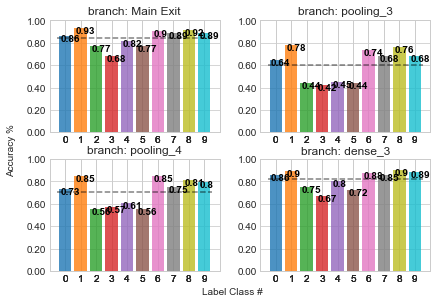

In [7]:
y = graphclassAccuracy(pred, labels, 4,[0,1,2,3,4,5,6,7,8,9], ["Main Exit","pooling_3","pooling_4","dense_3"])

I want to calculate the number of true/false of those that are passed on

In [15]:

def find_nearest(array, value):
    """returns the index of the element of array that is closest to value
        Nan is treated as 0 for the purpose of finding closest value.
    """
    if isinstance(array, pd.Series):
        indexes = find_neighbours(value,array)
        return indexes
    else:
        array = np.asarray(array)
        idx = np.nanargmin(np.abs(array - value))    
    print("nearest value to {} is {} at {}".format(value, array[idx], idx))
    return idx

def find_neighbours(df, value, colname=""):
    """ find the closest matches to a value in a dataframe, if there are multiple matches, use the match that has the highest 
        count value, aka the most number of counts.
    """
    if isinstance(df, pd.DataFrame):
        if (df[colname].notna().sum()) <= 0:
            # no valid values were found, return 0 
            print("no Valid values were found for df")
            return None
        exactmatch = df[df[colname] == value]
        if not exactmatch.empty:
            print("exactMatch")
            return exactmatch["count"].idxmax()
        else:
            try:            
                lowerneighbour_ind = df[df[colname] < value][colname].idxmax()
            except ValueError:
                lowerneighbour_ind = 0
            try:
                upperneighbour_ind = df[df[colname] > value][colname].idxmin()
            except ValueError:
                upperneighbour_ind = 0
                
#             print("lowerneighbour_ind {}".format(lowerneighbour_ind))
#             print("upperneighbour_ind {}".format(upperneighbour_ind))
            
            neighbours = df.iloc[[lowerneighbour_ind,upperneighbour_ind]]
#             print(neighbours)
#             print(neighbours["count"].idxmax())

#             neighbours = neighbours["accuracy"].sub(value).abs().idxmin()
#             print(neighbours)
            return neighbours["count"].idxmax()
    else:
        print("input is not a Dataframe, {}".format(type(df)))
        return None
    
def findThreshold(pred, labels, entropy, num_outputs, classes, output_names=[],mainBranchNum=0,avgAcc=False,graph=False):
    """    Find and Mark the threshold points for each class.
        mainbranchNum: the position in the pred array of the main exit, defaults to the first exit.
    """    
    resultsDict = {}
    results = np.equal(pred, labels)
    pred = np.array(pred)
    labels = np.array(labels)
    entropy = np.array(entropy)
    classCount = {}
    labelClasses=classes
    transpose_results = np.transpose(results) #truths
    transpose_preds = np.transpose(pred) #per exit rather then per input
    transpose_entropy = np.transpose(entropy) #per exit rather then per input
    transpose_labels = np.transpose(labels)
    if graph:
        plt.style.use('seaborn-whitegrid')
        fig = plt.figure()
        series=[]
        fig, axs = plt.subplots(2, 2)
        fig.tight_layout()
    df =  pd.DataFrame() 
    returnData = []
    
    ##find the main exit accuracy levels to compare the branches to.
    ##assume the first branch is the main branch to match too
    
    # mainAcc = findMainExitAccuracies(pred, labels, num_outputs, classes, output_names, graph=False)
    # print("accuracy Value: {}".format(mainAcc))

    if avgAcc:
        # mainAcc = [sum(mainAcc.values())/float(len(mainAcc.values()))]
        # mainAcc = np.repeat(mainAcc,len(classes))
        mainAcc = np.repeat(0.99,len(classes))
    print("accuracy Value: {}".format(mainAcc))
    thresholdPoints={}
    colors = cm.rainbow(np.linspace(0, 1, len(labelClasses)))
    for i, branchEntropy in enumerate(transpose_entropy):
#         print("branch {}".format(i))
        classEntropy = {}
        thresholdPoints[output_names[i]] = {}
        for j, labelClass in enumerate(labelClasses):
            classEntropy[labelClass] = []
            for k, entropy in enumerate(branchEntropy):
#                 print("sum is: {} len is: {}, combined is: {}".format(transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum(), len(transpose_labels[i][np.where((transpose_labels[i] == labelClass))]),transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum()/len(transpose_labels[i][np.where((transpose_labels[i] == labelClass))])))
                if len(transpose_preds[i][np.where((transpose_preds[i] == labelClass))])==0 :
#                     print("skip!")
                    continue
                seriesEntropy = {}
                seriesEntropy["entropy"] = entropy
                seriesEntropy["pred"] = transpose_preds[i][np.where((branchEntropy <= entropy) & (transpose_preds[i] == labelClass))] # select all where labelClass is PREDICTED
                seriesEntropy["labels"] = transpose_labels[i][np.where((branchEntropy <= entropy) & (transpose_preds[i] == labelClass))] # select all where labelClass is PREDICTED
                seriesEntropy["accuracy"] = transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum()/len(transpose_labels[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))])
                seriesEntropy["count"] = len(transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))])
                classEntropy[labelClass].append(seriesEntropy)
            df = pd.DataFrame(classEntropy[labelClass],columns=["entropy","pred","labels","accuracy","count"])
            threshold_idx = find_neighbours(df[["accuracy","count"]],mainAcc[labelClass],"accuracy")
            if threshold_idx == None:
                thresholdPoints[output_names[i]][labelClass] = {"accuracy":0,"count":0,"entropy":0}
            else:
#                 print(output_names[i])
#                 print(labelClass)
#                 print(threshold_idx)
#                 print(df.iloc[threshold_idx][["accuracy","count","entropy"]])
                thresholdPoints[output_names[i]][labelClass] = df.iloc[threshold_idx][["accuracy","count","entropy"]].to_dict()
#             maxRowidx = df["count"].idxmax()
            print("nearest value to {} is {} at {} with {} counts ".format(mainAcc[labelClass],df["accuracy"][threshold_idx],threshold_idx, df["count"][threshold_idx]))
#             print("The max count value is {} with {} counts".format(float(df.iloc[maxRowidx]["accuracy"]), int(df.iloc[maxRowidx]["count"])))
            if graph:
                axs[round(int(i/2)), round(i%2)].plot(thresholdPoints[output_names[i]][labelClass]["count"],thresholdPoints[output_names[i]][labelClass]["accuracy"],marker='v', markersize=5, color=colors[j])
                df = df.sort_values(by=["count"])
                axs[round(int(i/2)), round(i%2)].plot(df["count"],df["accuracy"], label="Class: {}".format(labelClass), color=colors[j], alpha=0.8)        

                axs[round(int(i/2)), round(i%2)].plot()

                axs[round(int(i/2)), round(i%2)].set_ylim([0, 1])
        if graph:
            if len(output_names) >= i:
                axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(output_names[i]))
            else:
                axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(i))
            
        returnData.append(classEntropy)
    lines = []
    labels = []
    if graph:
        for ax in fig.axes:
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            axLine, axLabel = ax.get_legend_handles_labels()
            lines=(axLine)
            labels=(axLabel)

        # Set common labels
        fig.text(0.5, 0.01, 'Items Exit at Branch', ha='center', va='center')
        fig.text(0.01, 0.5, 'Accuracy %', ha='center', va='center', rotation='vertical')
        fig.legend(lines, labels,bbox_to_anchor=(1., 1), loc=2,borderaxespad=0.,frameon=True)
#     df.to_csv("graph_output.csv")
    return thresholdPoints

In [16]:
thresholdpoints = findThreshold(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9], ["main branch","pooling_3","pooling_4","dense_3"],avgAcc=True,graph=True)

print("Threshold Points:")
print(thresholdpoints)

accuracy Value: [0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99]


C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in long_scalars
